In [1]:
!pip install tslearn numpy matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 3.9 MB/s eta 0:00:00


In [2]:
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMinMax

# Load synthetic dataset
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

# Scale time series data
scaler = TimeSeriesScalerMinMax()
X_train_scaled = scaler.fit_transform(X_train)


In [3]:
from tslearn.clustering import KShape
from tslearn.utils import to_time_series_dataset

# Convert to time series dataset
X_train_ts = to_time_series_dataset(X_train_scaled)

# Initialize and fit the K-Shape clustering model
n_clusters = 3  # Choose the number of clusters
model = KShape(n_clusters=n_clusters, random_state=42)
y_pred = model.fit_predict(X_train_ts)


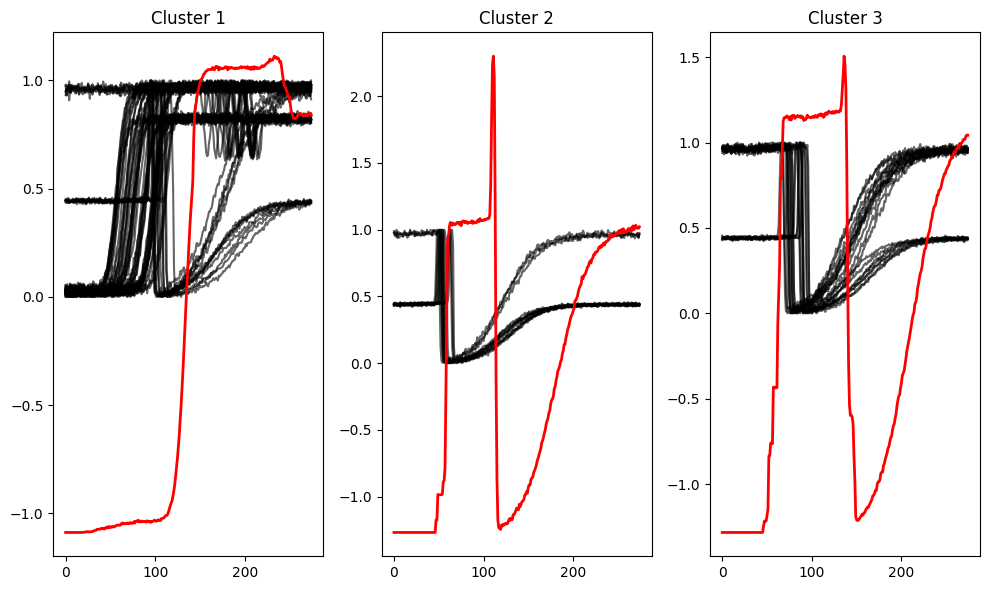

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster_idx in range(n_clusters):
    plt.subplot(1, n_clusters, cluster_idx + 1)
    for series in X_train_scaled[y_pred == cluster_idx]:
        plt.plot(series.ravel(), "k-", alpha=0.6)  # Plot each time series
    plt.plot(model.cluster_centers_[cluster_idx].ravel(), "r-", lw=2)  # Cluster center
    plt.title(f"Cluster {cluster_idx + 1}")
plt.tight_layout()
plt.show()
